In [1]:
import os
import unittest
import numpy as np
import pandas as pd
import matplotlib
import warnings
from sklearn.datasets import make_classification, make_regression
from ProQSAR.ModelDeveloper.model_validation import ModelValidation
warnings.filterwarnings("ignore", category=FutureWarning)

def create_classification_data(
    n_samples=60, n_features=25, n_informative=10, random_state=42
) -> pd.DataFrame:

    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data
def create_regression_data(
    n_samples=40, n_features=20, n_informative=10, random_state=42
) -> pd.DataFrame:
    """
    Generate a DataFrame containing synthetic regression data.

    Args:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_informative (int): The number of informative features.
        random_state (int): Seed for random number generation.

    Returns:
        pd.DataFrame: DataFrame with features, ID, and activity columns.
    """
    X, y = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data

class_data = create_classification_data()
reg_data = create_regression_data()

cv_result = ModelValidation.cross_validation_report(
    reg_data, 
    activity_col="Activity", 
    id_col="ID", 
    n_splits=5, 
    n_repeats=5,
    save_csv=False)


from IPython.display import display
display(cv_result)


from ProQSAR.Analysis.statistical_analysis import StatisticalAnalysis
report, scoring, method = StatisticalAnalysis.extract_scoring_dfs(report_df=cv_result, melt=False)
display(report)

method              AdaBoostRegressor  CatBoostRegressor  ElasticNetCV  \
scoring   cv_cycle                                                       
max_error 1               -259.568080        -286.153832    -83.705161   
          2               -406.908927        -432.495562   -135.429175   
          3                -97.585498        -126.779621    -29.167801   
          4               -165.274925        -194.428191    -77.188393   
          5               -100.665470        -105.008593    -38.726997   
...                               ...                ...           ...   
r2        24                 0.461254           0.260175      0.901505   
          25                 0.139556          -0.049922      0.903186   
          mean               0.233672           0.185996      0.919150   
          median             0.322229           0.260175      0.932772   
          std                0.306332           0.225995      0.045615   

method              ExtraTreesRegressor  GradientBoostingRegressor  \
scoring   cv_cycle                                                   
max_error 1                 -237.160702                -226.547269   
          2                 -436.246559                -306.845913   
          3                 -109.641167                -274.024824   
          4                 -175.835684                -230.896287   
          5                 -164.553704                -237.850858   
...                                 ...                        ...   
r2        24                   0.334380                  -0.565204   
          25                   0.369567                  -0.534961   
          mean                 0.348053                   0.037395   
          median               0.389020                   0.223134   
          std                  0.227736                   0.598193   

method              KNeighborsRegressor  LinearRegression  MLPRegressor  \
scoring   cv_cycle                                                        
max_error 1                 -280.653679     -1.342926e-12   -187.612781   
          2                 -444.646747     -7.389644e-13   -306.173397   
          3                 -116.186158     -1.076472e-12   -148.263964   
          4                 -225.936837     -5.684342e-13   -177.867166   
          5                 -162.401892     -2.131628e-13   -133.223222   
...                                 ...               ...           ...   
r2        24                   0.405175      1.000000e+00      0.468025   
          25                   0.003763      1.000000e+00      0.377831   
          mean                 0.086265      1.000000e+00      0.408161   
          median               0.156786      1.000000e+00      0.479407   
          std                  0.209707      0.000000e+00      0.433659   

method              RandomForestRegressor      Ridge         SVR  XGBRegressor  
scoring   cv_cycle                                                              
max_error 1                   -277.736733 -39.947662 -338.202737   -234.155290  
          2                   -382.937348 -60.338115 -444.499817   -348.890529  
          3                   -124.370212 -11.117013 -148.228148   -193.061871  
          4                   -184.315755 -25.176444 -248.541594   -320.672050  
          5                   -158.128520 -19.237558 -147.716557   -185.030771  
...                                   ...        ...         ...           ...  
r2        24                     0.363007   0.986027   -0.001680     -0.406205  
          25                    -0.401329   0.978669   -0.189786     -0.562456  
          mean                   0.202851   0.982529   -0.140009     -0.061127  
          median                 0.308638   0.987444   -0.026012      0.161266  
          std                    0.304106   0.016835    0.220505      0.722467  

[196 rows x 12 columns]

method              AdaBoostRegressor  CatBoostRegressor  ElasticNetCV  \
scoring   cv_cycle                                                       
max_error 1               -259.568080        -286.153832    -83.705161   
          2               -406.908927        -432.495562   -135.429175   
          3                -97.585498        -126.779621    -29.167801   
          4               -165.274925        -194.428191    -77.188393   
          5               -100.665470        -105.008593    -38.726997   
...                               ...                ...           ...   
r2        21                 0.322229           0.263676      0.908121   
          22                 0.247269           0.294669      0.984585   
          23                -0.637861          -0.528699      0.890390   
          24                 0.461254           0.260175      0.901505   
          25                 0.139556          -0.049922      0.903186   

method              ExtraTreesRegressor  GradientBoostingRegressor  \
scoring   cv_cycle                                                   
max_error 1                 -237.160702                -226.547269   
          2                 -436.246559                -306.845913   
          3                 -109.641167                -274.024824   
          4                 -175.835684                -230.896287   
          5                 -164.553704                -237.850858   
...                                 ...                        ...   
r2        21                   0.363707                   0.589603   
          22                   0.630059                   0.229624   
          23                  -0.306542                  -0.489709   
          24                   0.334380                  -0.565204   
          25                   0.369567                  -0.534961   

method              KNeighborsRegressor  LinearRegression  MLPRegressor  \
scoring   cv_cycle                                                        
max_error 1                 -280.653679     -1.342926e-12   -187.612781   
          2                 -444.646747     -7.389644e-13   -306.173397   
          3                 -116.186158     -1.076472e-12   -148.263964   
          4                 -225.936837     -5.684342e-13   -177.867166   
          5                 -162.401892     -2.131628e-13   -133.223222   
...                                 ...               ...           ...   
r2        21                   0.220623      1.000000e+00      0.568334   
          22                  -0.207196      1.000000e+00      0.734664   
          23                  -0.561298      1.000000e+00      0.479407   
          24                   0.405175      1.000000e+00      0.468025   
          25                   0.003763      1.000000e+00      0.377831   

method              RandomForestRegressor      Ridge         SVR  XGBRegressor  
scoring   cv_cycle                                                              
max_error 1                   -277.736733 -39.947662 -338.202737   -234.155290  
          2                   -382.937348 -60.338115 -444.499817   -348.890529  
          3                   -124.370212 -11.117013 -148.228148   -193.061871  
          4                   -184.315755 -25.176444 -248.541594   -320.672050  
          5                   -158.128520 -19.237558 -147.716557   -185.030771  
...                                   ...        ...         ...           ...  
r2        21                     0.340811   0.968149   -0.046205      0.508760  
          22                     0.482463   0.997092   -0.447089      0.390859  
          23                    -0.612584   0.978409   -0.903840     -0.764334  
          24                     0.363007   0.986027   -0.001680     -0.406205  
          25                    -0.401329   0.978669   -0.189786     -0.562456  

[175 rows x 12 columns]

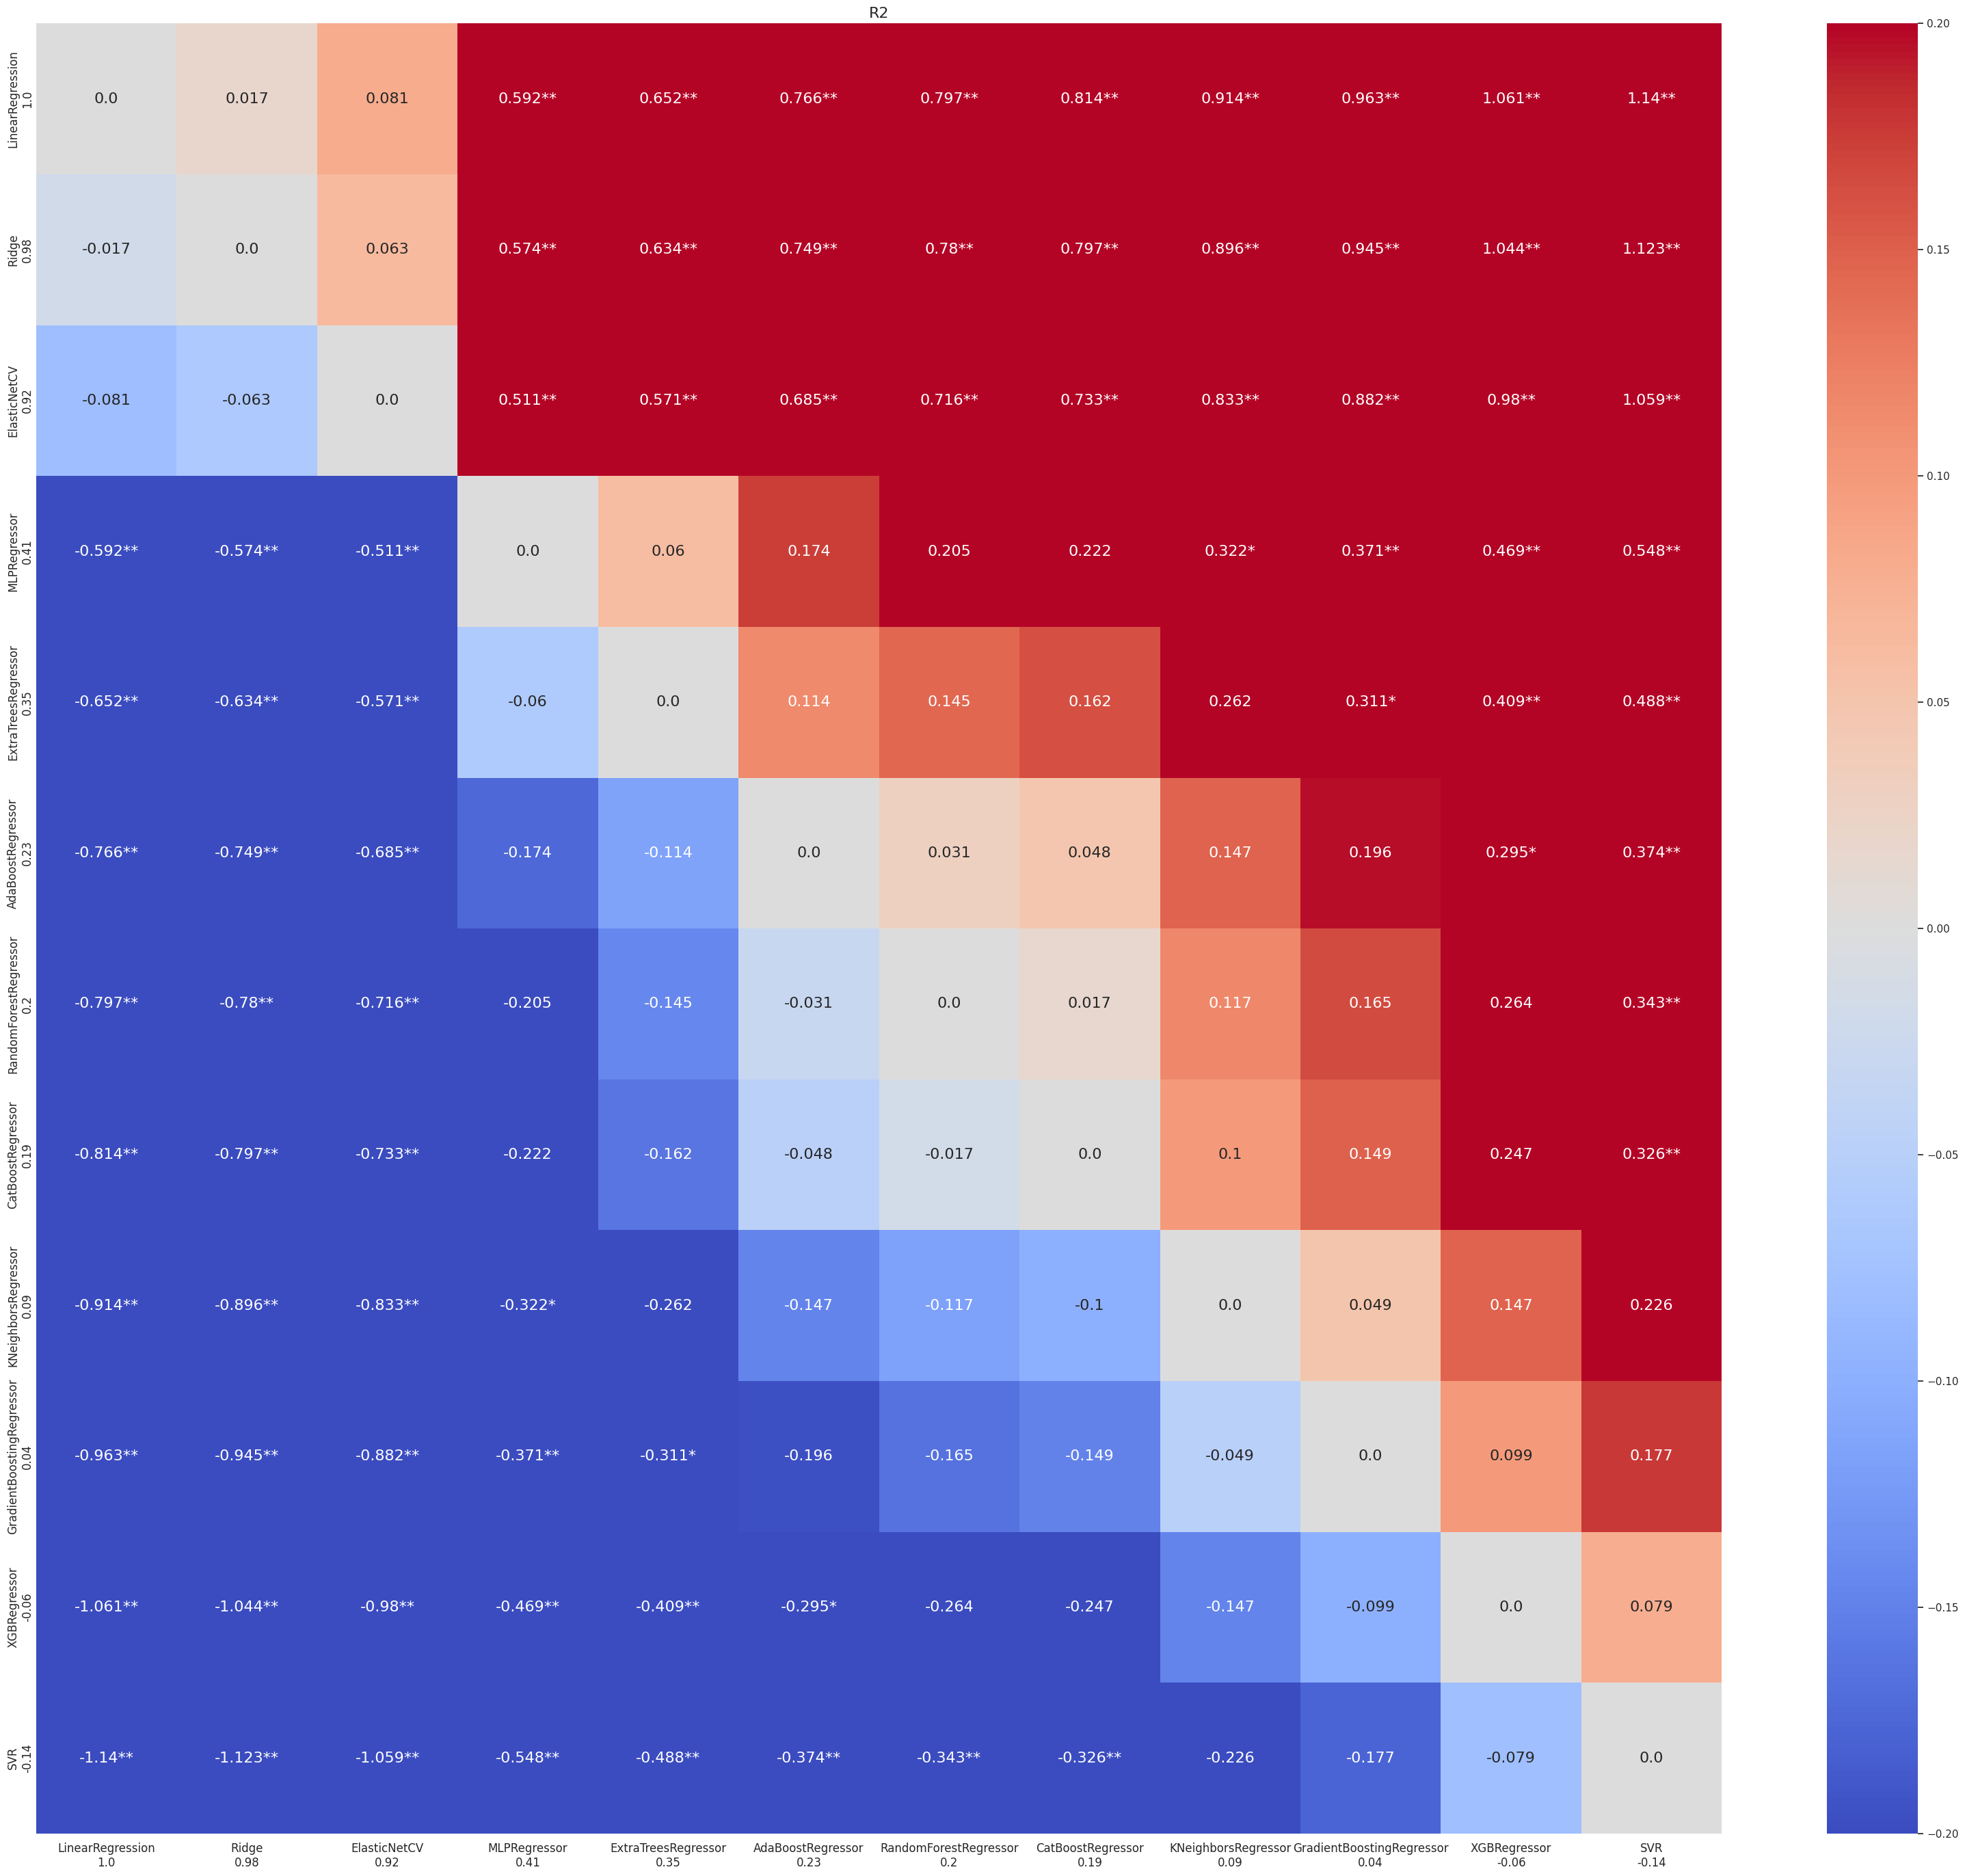

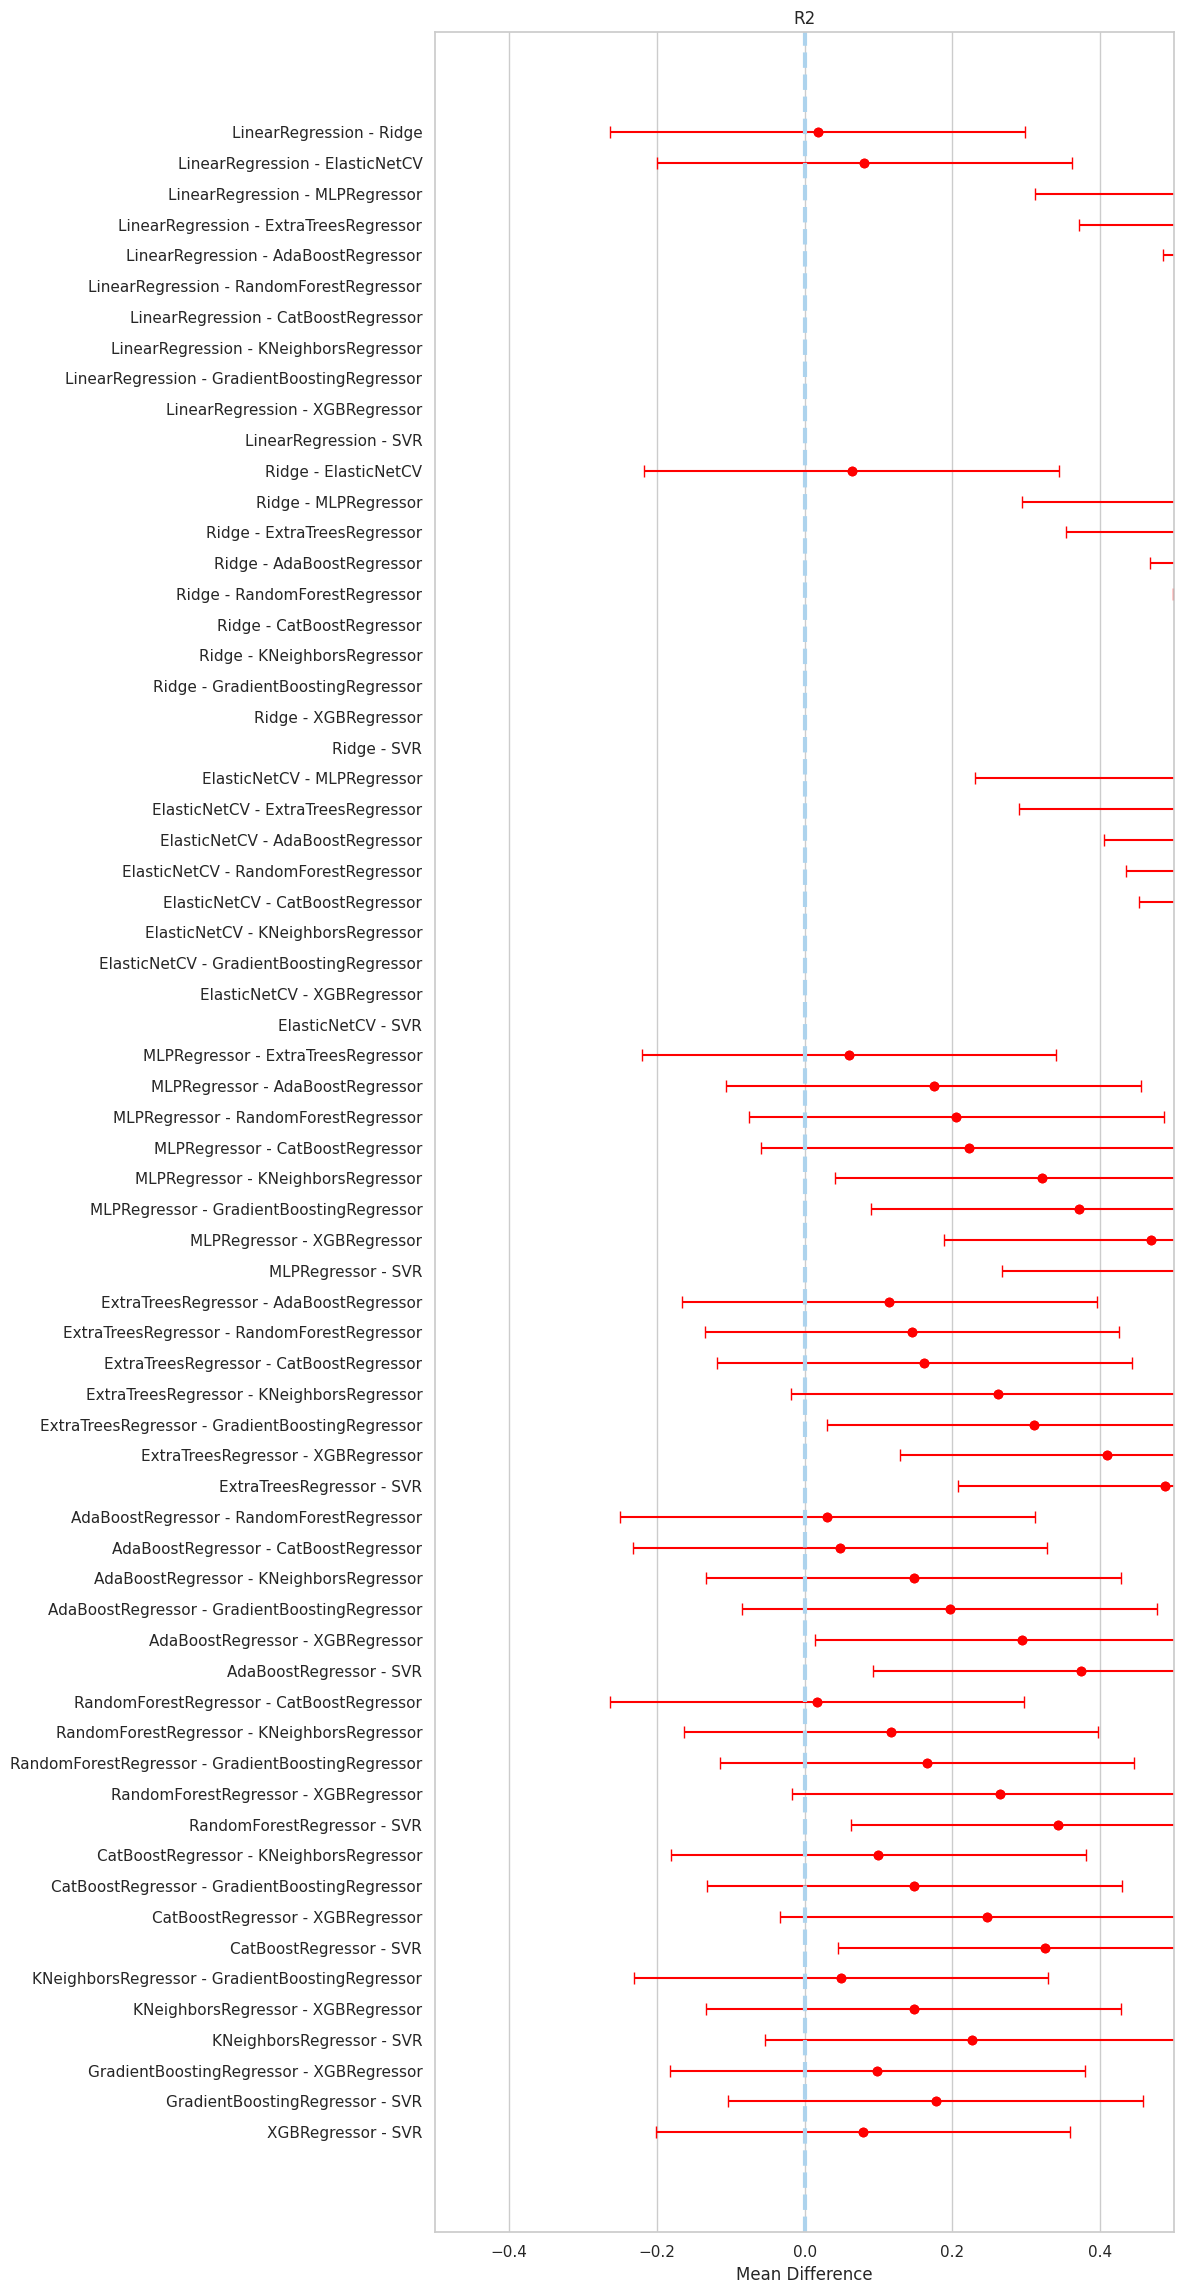

In [5]:
tukey = StatisticalAnalysis.posthoc_tukeyhsd(report_df=cv_result, scoring_list=['r2'])

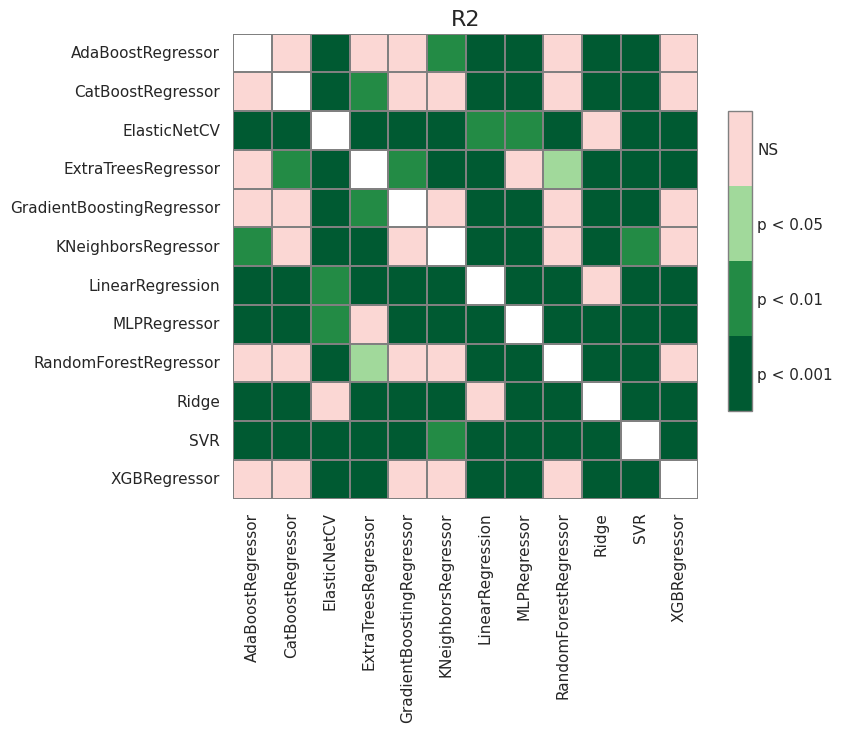

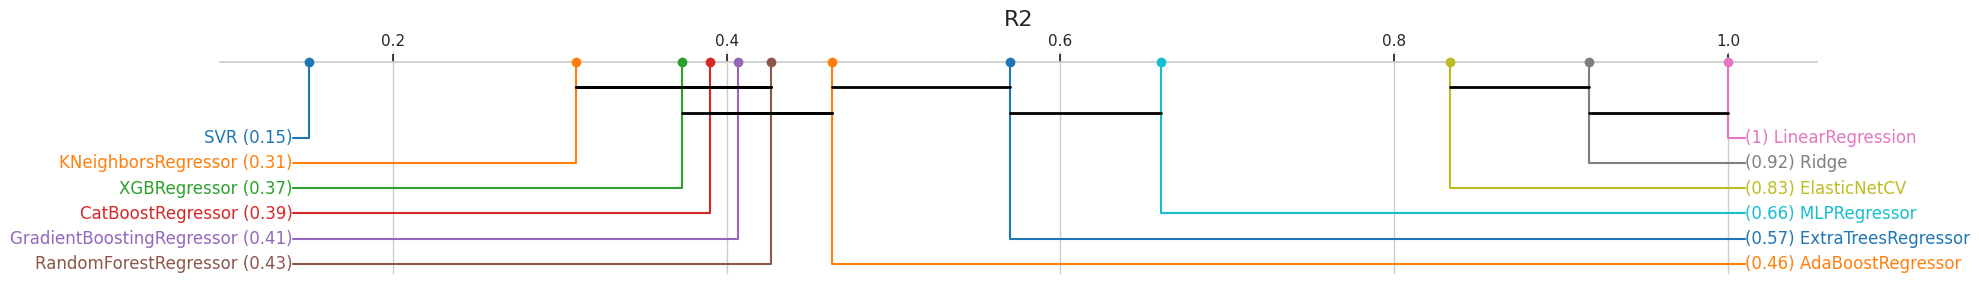

In [8]:
pc_results, rank = StatisticalAnalysis.posthoc_conover_friedman(report_df=cv_result, scoring_list='r2')

/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/scikit_posthocs/_posthocs.py:734: RuntimeWarning: divide by zero encountered in scalar divide
  tval = dif / np.sqrt(A) / np.sqrt(B)


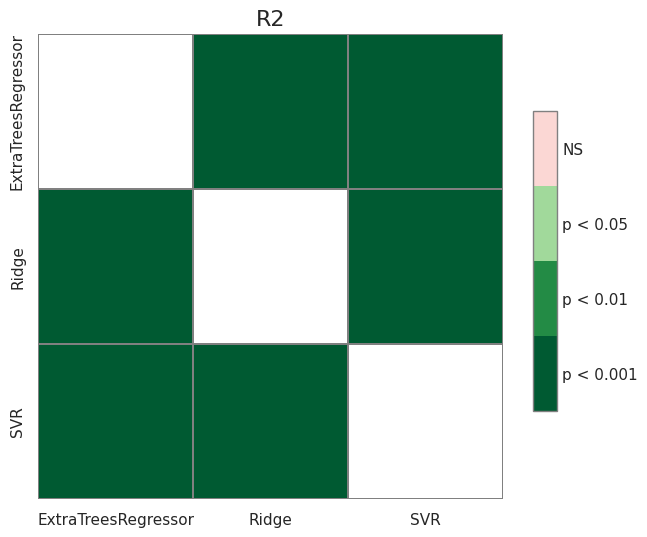

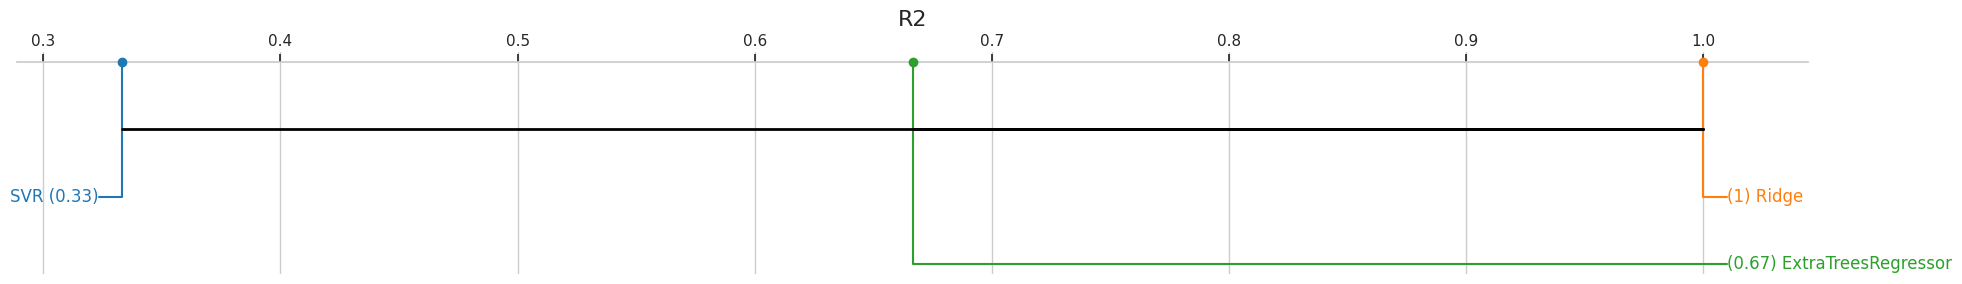

In [3]:
pc_results, rank = StatisticalAnalysis.posthoc_conover_friedman(report_df=cv_result, scoring_list="R2", method_list=["Ridge", "SVR", "ExtraTreesRegressor"])

In [4]:
display(pc_results["r2"])

,ExtraTreesRegressor,Ridge,SVR
ExtraTreesRegressor,1.0,0.0,0.0
Ridge,0.0,1.0,0.0
SVR,0.0,0.0,1.0


In [5]:
display(rank["r2"])

method
ExtraTreesRegressor    0.666667
Ridge                  1.000000
SVR                    0.333333
dtype: float64

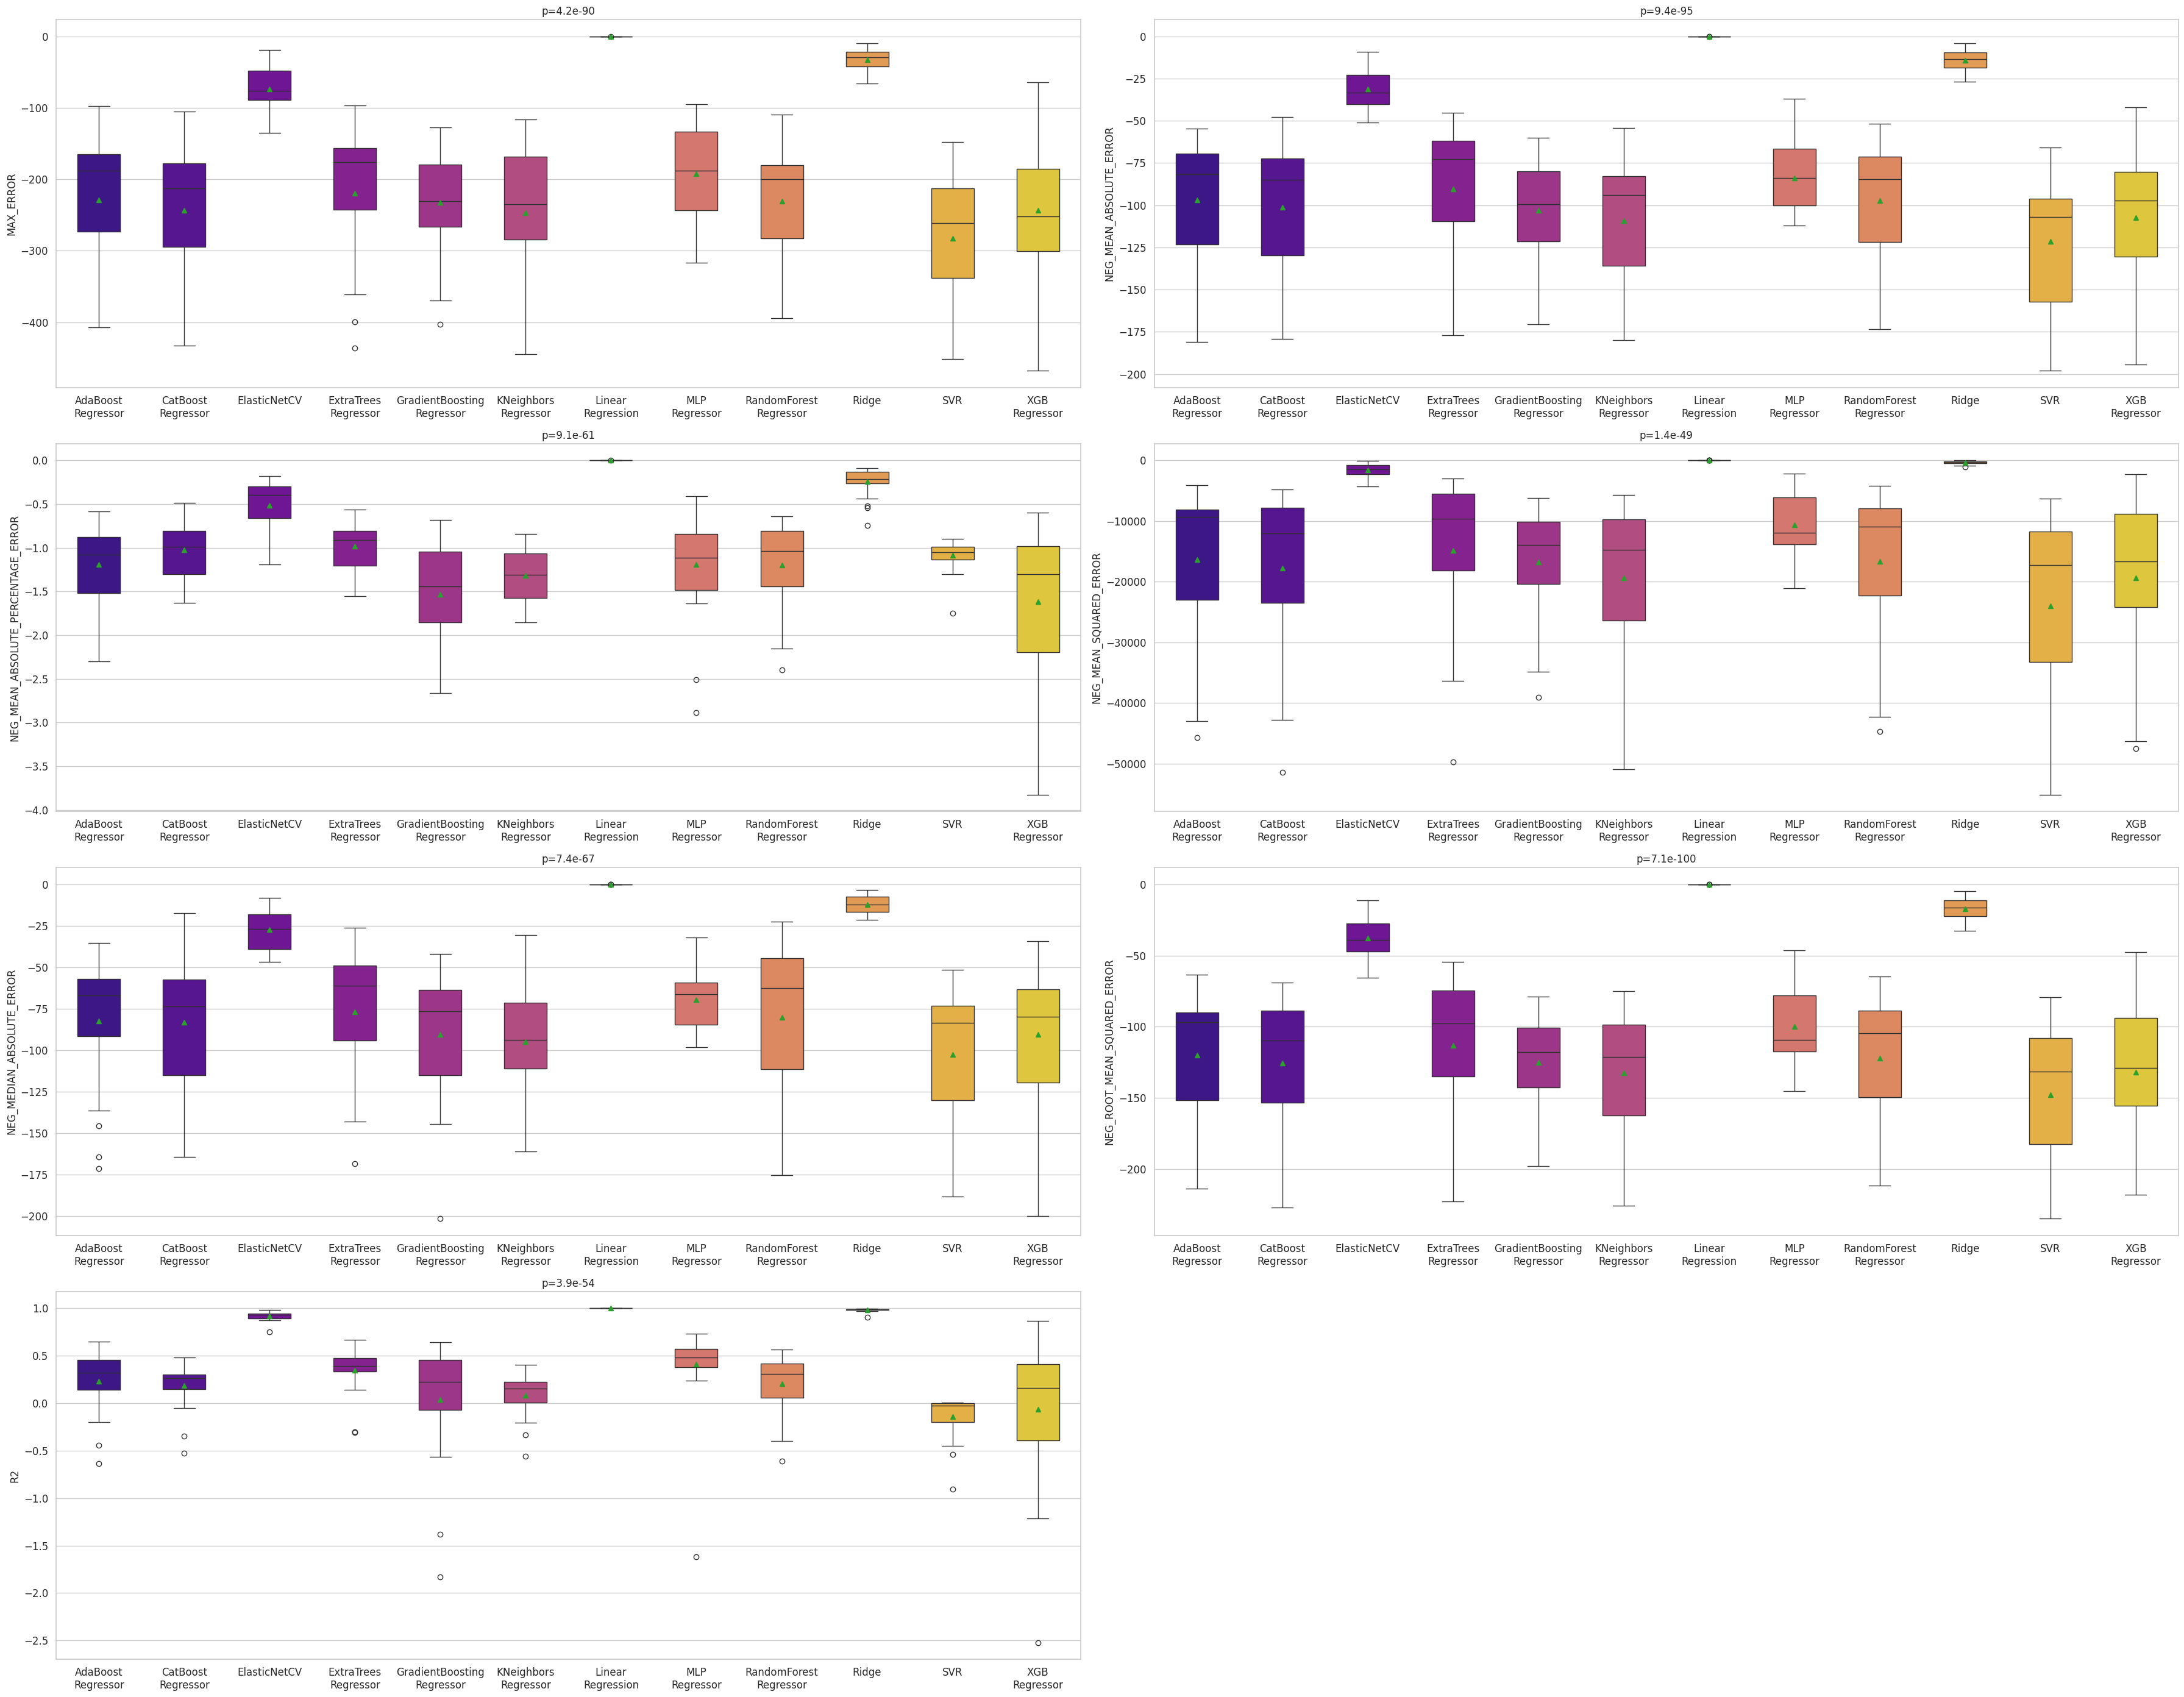

In [6]:
StatisticalAnalysis.test(report_df=cv_result, showmeans=True)

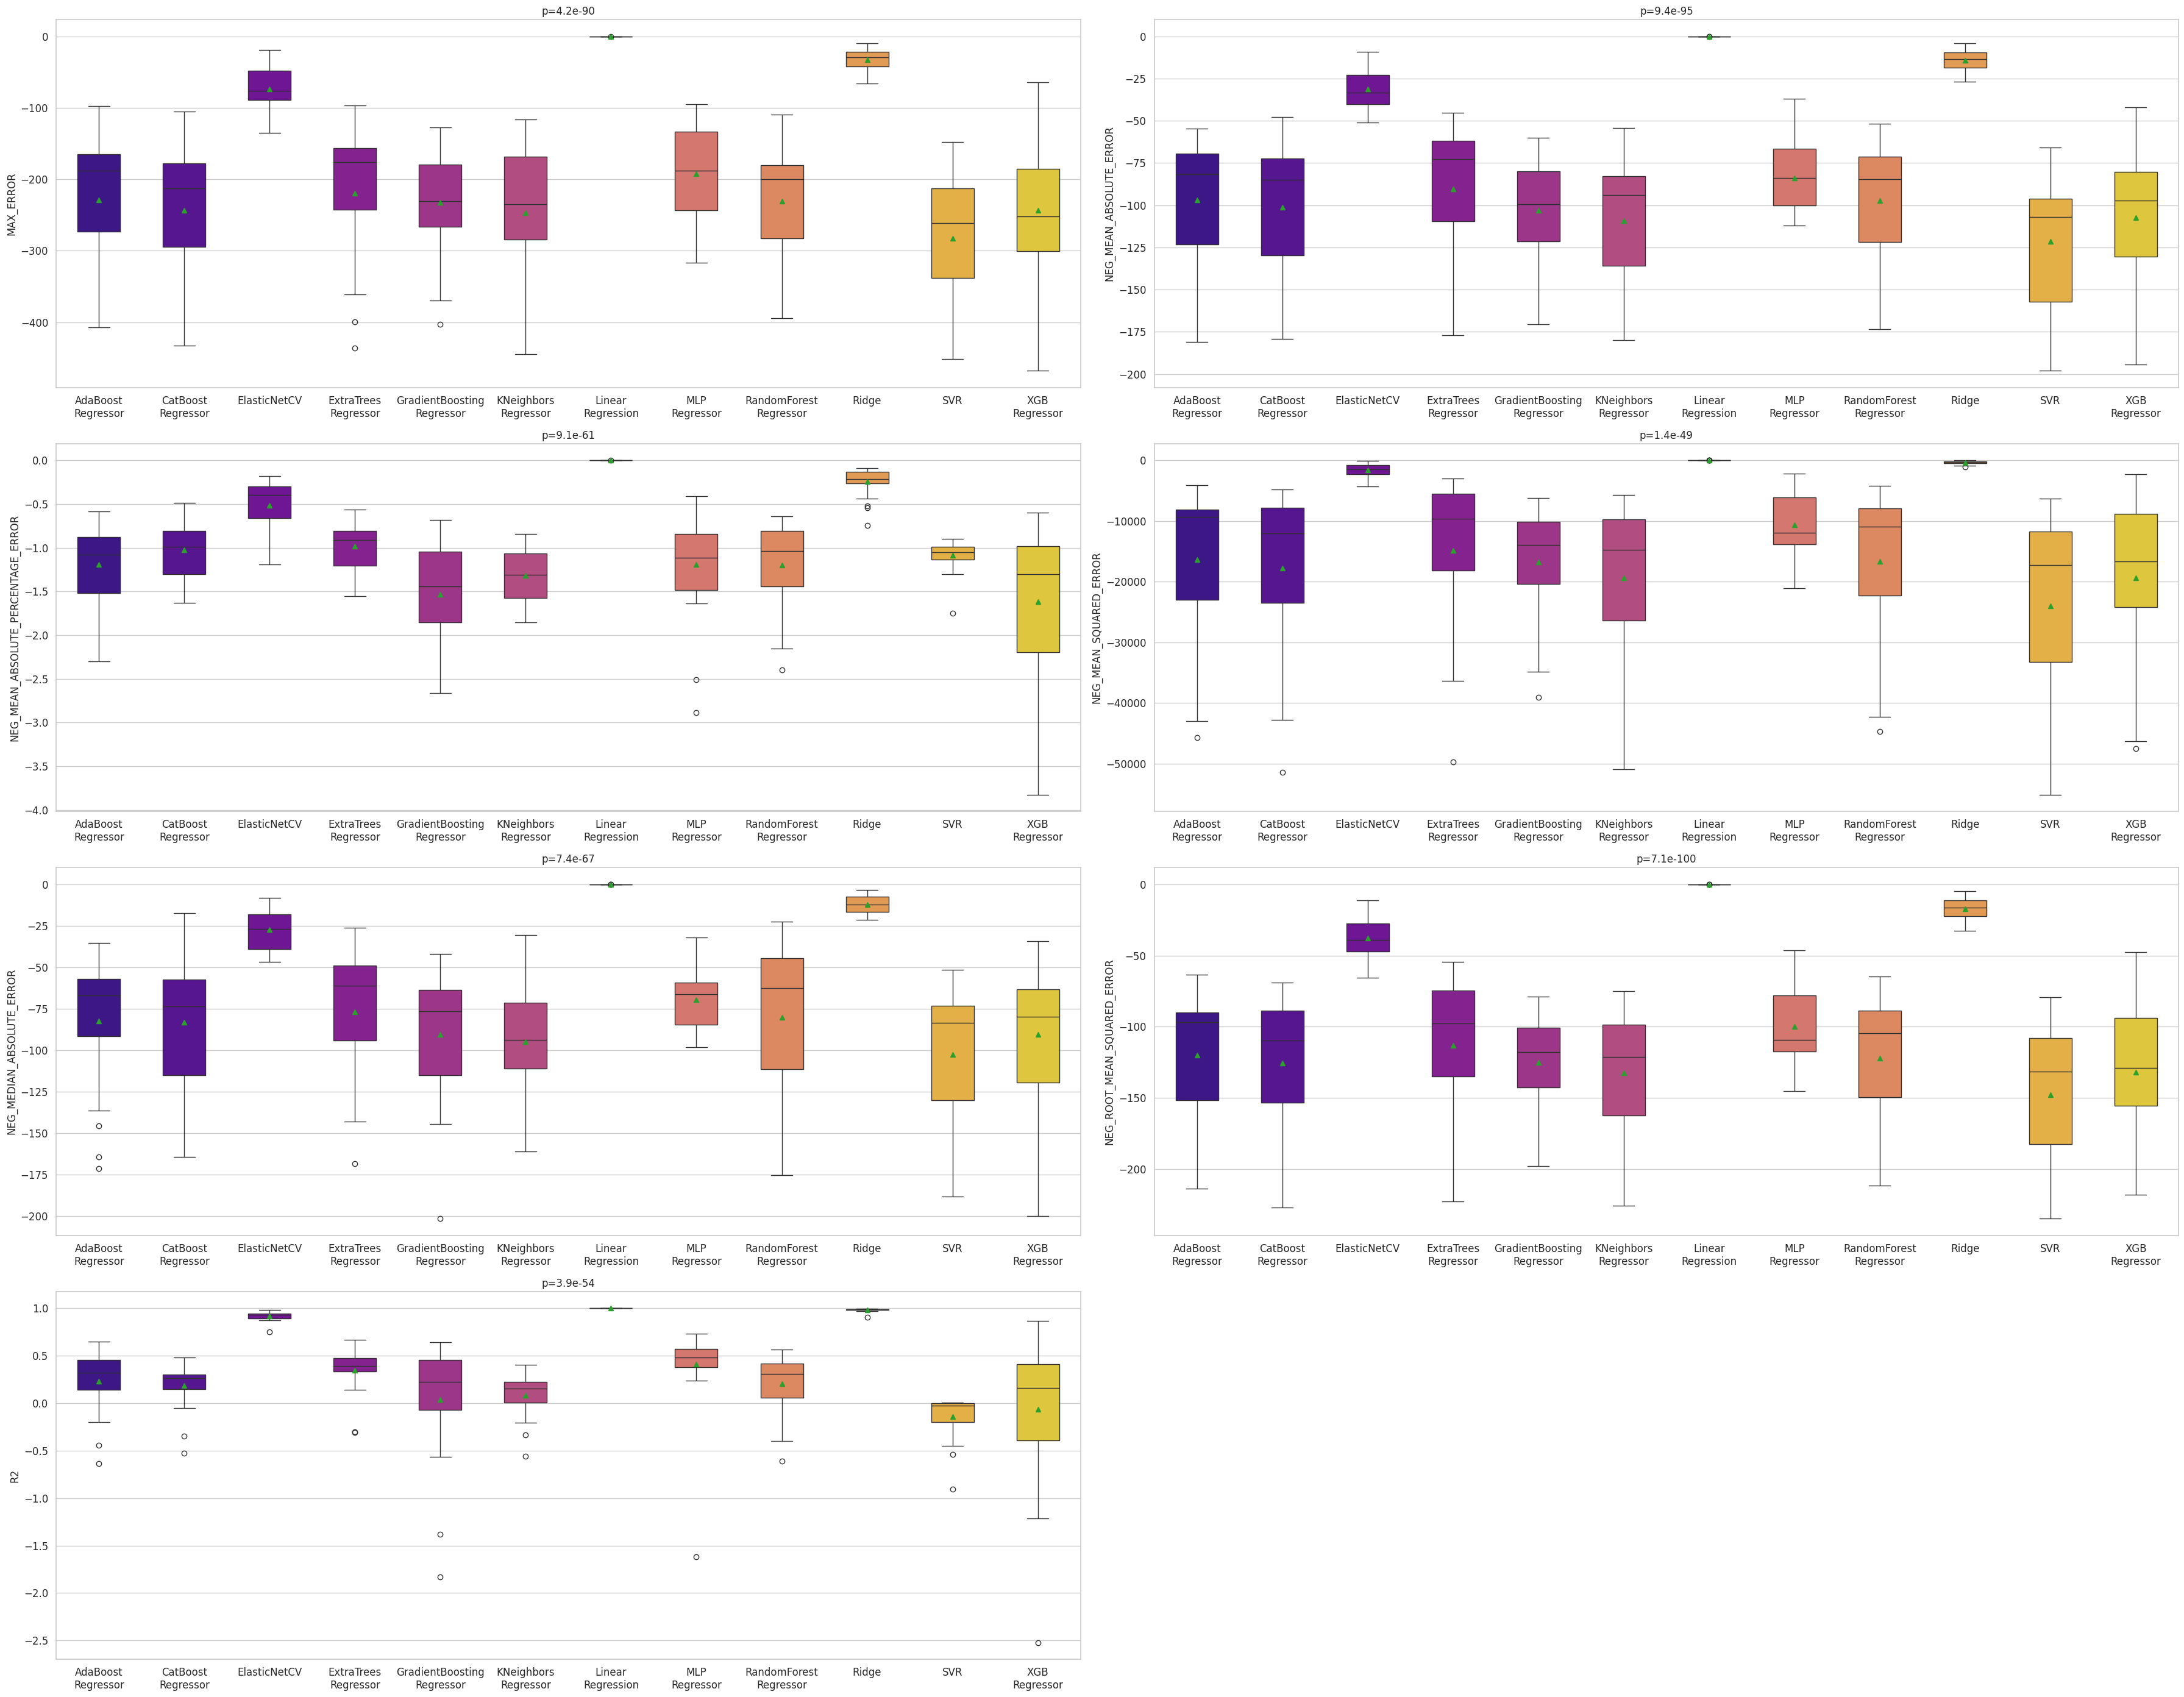

In [7]:
StatisticalAnalysis.test(report_df=cv_result, select_test="AnovaRM")

In [8]:
var = StatisticalAnalysis.check_variance_homogeneity(report_df=cv_result)
display(var)

/home/labhhc4/Documents/Workspace/Tuyet Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:93: RuntimeWarning: divide by zero encountered in scalar divide
  max_fold_diff = variances_by_method.max() / variances_by_method.min()


,variance_fold_difference,p_value
scoring,,
max_error,1.185660e+29,2.798995e-10
neg_mean_absolute_error,6.080615e+28,1.109848e-10
neg_mean_absolute_percentage_error,5.749647e+28,4.569927e-14
neg_mean_squared_error,8.056888e+57,3.098140e-10
neg_median_absolute_error,6.128103e+28,1.628283e-10
neg_root_mean_squared_error,6.840886e+28,5.333510e-11
r2,inf,5.043888e-10


In [ ]:
var2 = StatisticalAnalysis.check_variance_homogeneity(report_df=cv_result)
display(var2)

/home/labhhc4/Documents/Workspace/Tuyet Minh/ProQSAR/ProQSAR/Analysis/statistical_analysis.py:93: RuntimeWarning: divide by zero encountered in scalar divide
  max_fold_diff = variances_by_method.max() / variances_by_method.min()


,variance_fold_difference,p_value
scoring,,
max_error,1.185660e+29,2.798995e-10
neg_mean_absolute_error,6.080615e+28,1.109848e-10
neg_mean_absolute_percentage_error,5.749647e+28,4.569927e-14
neg_mean_squared_error,8.056888e+57,3.098140e-10
neg_median_absolute_error,6.128103e+28,1.628283e-10
neg_root_mean_squared_error,6.840886e+28,5.333510e-11
r2,inf,5.043888e-10


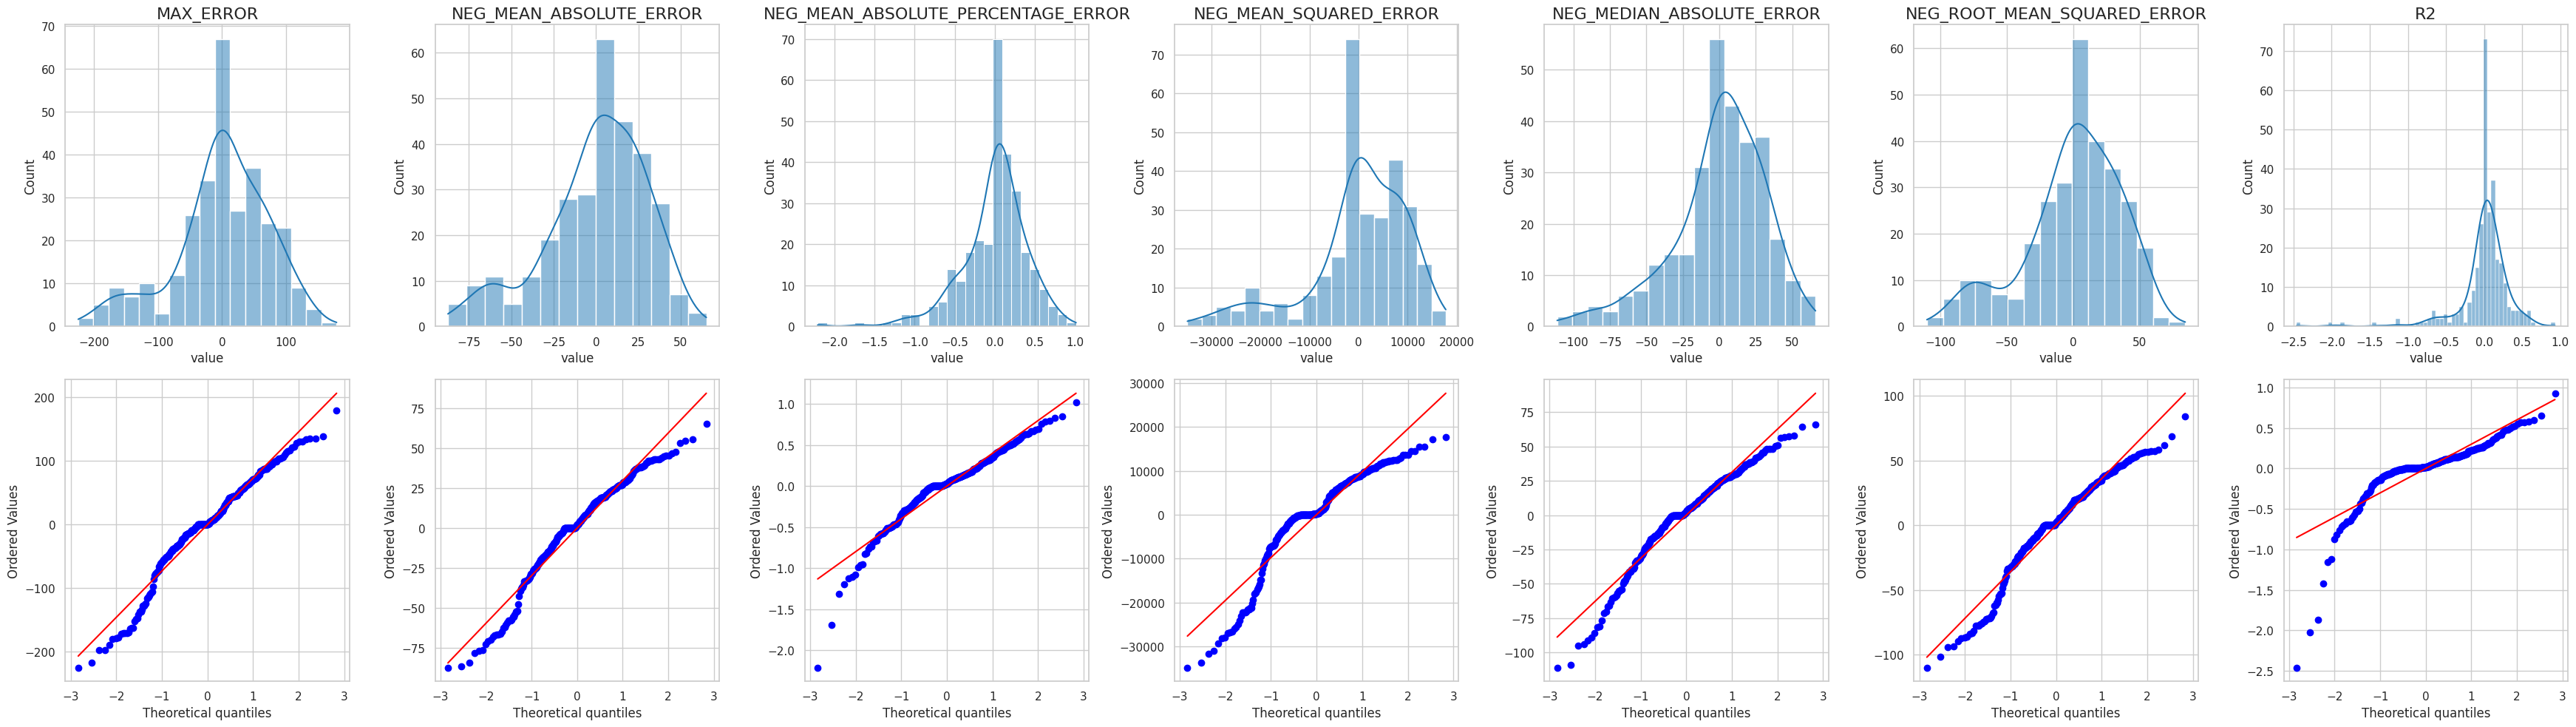

In [10]:
StatisticalAnalysis.check_normality(report_df=cv_result)

In [11]:
StatisticalAnalysis.check_normality(report_df=cv_result, scoring_list=scoring_list2)

NameError: name 'scoring_list2' is not defined

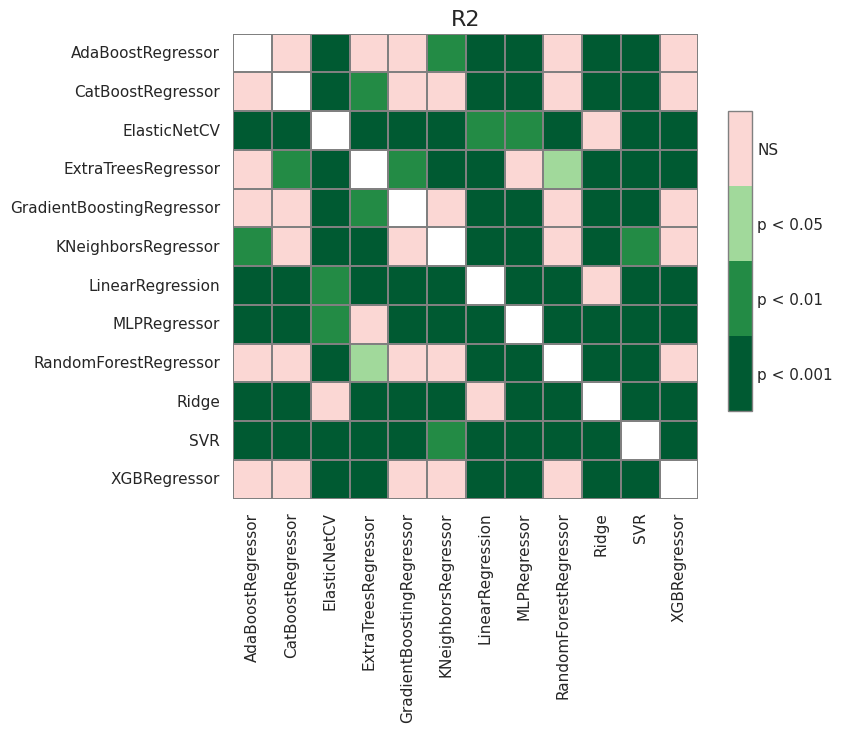

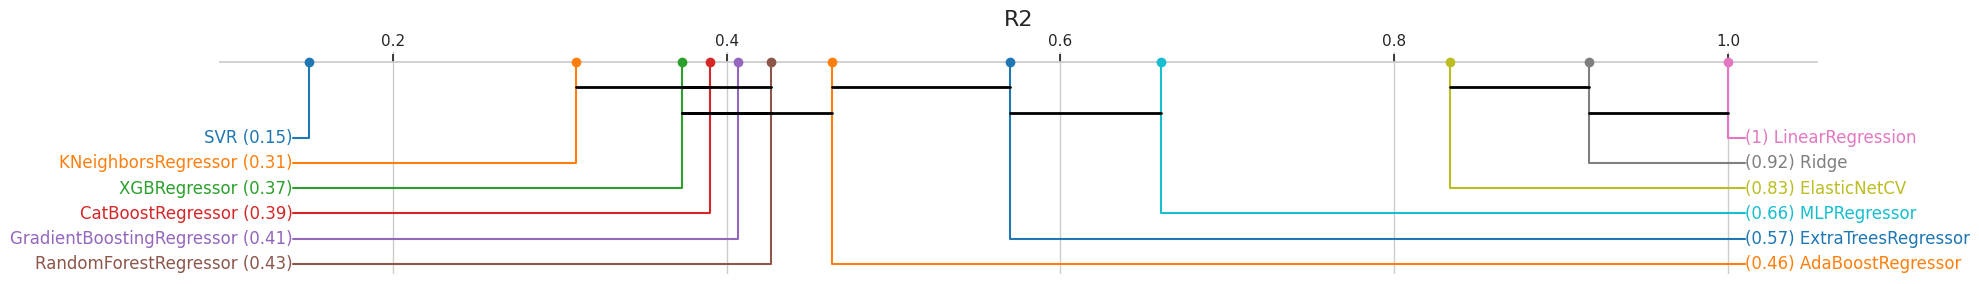

In [ ]:
pc_results, rank = StatisticalAnalysis.posthoc_conover_friedman(report_df=cv_result, scoring_list="r2")

In [43]:
from IPython.display import display
display(pc_results["r2"])

,AdaBoostRegressor,CatBoostRegressor,ElasticNetCV,ExtraTreesRegressor,GradientBoostingRegressor,KNeighborsRegressor,LinearRegression,MLPRegressor,RandomForestRegressor,Ridge,SVR,XGBRegressor
AdaBoostRegressor,1.000000e+00,9.086940e-01,3.993072e-14,2.414948e-01,1.000000e+00,9.173992e-03,1.891776e-26,2.199887e-04,1.000000e+00,4.644163e-20,1.787989e-10,5.735913e-01
CatBoostRegressor,9.086940e-01,1.000000e+00,2.542999e-19,1.053272e-03,1.000000e+00,7.176643e-01,2.624497e-32,5.962509e-08,1.000000e+00,1.148187e-25,2.042617e-06,1.000000e+00
ElasticNetCV,3.993072e-14,2.542999e-19,1.000000e+00,1.359926e-07,4.139654e-18,2.064553e-25,3.320352e-03,1.889272e-03,1.111361e-16,7.133379e-01,2.772662e-38,1.491997e-20
ExtraTreesRegressor,2.414948e-01,1.053272e-03,1.359926e-07,1.000000e+00,4.270678e-03,2.012033e-07,2.409389e-18,5.735913e-01,1.972138e-02,1.395746e-12,1.240723e-17,2.199887e-04
GradientBoostingRegressor,1.000000e+00,1.000000e+00,4.139654e-18,4.270678e-03,1.000000e+00,4.179470e-01,5.702602e-31,4.206789e-07,1.000000e+00,2.255081e-24,2.962939e-07,1.000000e+00
KNeighborsRegressor,9.173992e-03,7.176643e-01,2.064553e-25,2.012033e-07,4.179470e-01,1.000000e+00,8.006301e-39,8.616863e-13,1.329451e-01,4.814914e-32,5.455711e-03,1.000000e+00
LinearRegression,1.891776e-26,2.624497e-32,3.320352e-03,2.409389e-18,5.702602e-31,8.006301e-39,1.000000e+00,3.717456e-12,2.304181e-29,7.133379e-01,7.739636e-52,1.174323e-33
MLPRegressor,2.199887e-04,5.962509e-08,1.889272e-03,5.735913e-01,4.206789e-07,8.616863e-13,3.717456e-12,1.000000e+00,4.317715e-06,2.962939e-07,2.255081e-24,7.002836e-09
RandomForestRegressor,1.000000e+00,1.000000e+00,1.111361e-16,1.972138e-02,1.000000e+00,1.329451e-01,2.304181e-29,4.317715e-06,1.000000e+00,7.776561e-23,2.573826e-08,1.000000e+00
Ridge,4.644163e-20,1.148187e-25,7.133379e-01,1.395746e-12,2.255081e-24,4.814914e-32,7.133379e-01,2.962939e-07,7.776561e-23,1.000000e+00,4.322359e-45,5.690806e-27


In [12]:
import os
import unittest
import pandas as pd
import numpy as np
import matplotlib
from tempfile import TemporaryDirectory
from sklearn.datasets import make_classification, make_regression
from ProQSAR.Analysis.statistical_analysis import StatisticalAnalysis
from ProQSAR.ModelDeveloper.model_validation import ModelValidation 


# Functions to create synthetic data
def create_classification_data(n_samples=60, n_features=25, n_informative=10, random_state=42):
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data

def create_regression_data(n_samples=40, n_features=20, n_informative=10, random_state=42):
    X, y = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data

class_data = create_classification_data()
reg_data = create_regression_data()

cv_class = ModelValidation.cross_validation_report(
    class_data, 
    activity_col="Activity", 
    id_col="ID",
    n_splits=5, 
    n_repeats=5,
    save_csv=False
)

cv_reg = ModelValidation.cross_validation_report(
    reg_data, 
    activity_col="Activity", 
    id_col="ID", 
    n_splits=5, 
    n_repeats=5,
    save_csv=False
)

/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 64.
  warnings.warn(
/home/labhhc4/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear

In [28]:
from IPython.display import display
display(cv_class)
display(cv_reg)
cv_class.to_csv("Data/cv_class.csv")
cv_reg.to_csv("Data/cv_reg.csv")

method             AdaBoostClassifier  CatBoostClassifier  \
scoring  cv_cycle                                           
accuracy 1                   0.583333            0.750000   
         2                   0.583333            0.666667   
         3                   0.833333            0.750000   
         4                   0.750000            0.833333   
         5                   0.833333            0.916667   
...                               ...                 ...   
roc_auc  24                  0.722222            0.888889   
         25                  1.000000            0.944444   
         mean                0.827778            0.887778   
         median              0.861111            0.916667   
         std                 0.138109            0.092789   

method             ExtraTreesClassifier  GradientBoostingClassifier  \
scoring  cv_cycle                                                     
accuracy 1                     0.666667                    0.500000   
         2                     0.916667                    0.750000   
         3                     0.916667                    0.750000   
         4                     0.833333                    0.750000   
         5                     1.000000                    0.916667   
...                                 ...                         ...   
roc_auc  24                    0.861111                    0.777778   
         25                    0.944444                    0.847222   
         mean                  0.899444                    0.817222   
         median                0.916667                    0.847222   
         std                   0.076707                    0.144213   

method             KNeighborsClassifier  LogisticRegression  MLPClassifier  \
scoring  cv_cycle                                                            
accuracy 1                     0.666667            0.500000       0.666667   
         2                     0.833333            0.666667       0.750000   
         3                     0.916667            0.666667       0.666667   
         4                     0.750000            0.750000       0.750000   
         5                     0.666667            0.833333       0.833333   
...                                 ...                 ...            ...   
roc_auc  24                    0.861111            0.888889       1.000000   
         25                    0.819444            0.666667       0.777778   
         mean                  0.864444            0.764444       0.847778   
         median                0.861111            0.805556       0.861111   
         std                   0.082988            0.120728       0.104563   

method             RandomForestClassifier       SVC  XGBClassifier  
scoring  cv_cycle                                                   
accuracy 1                       0.666667  0.750000       0.666667  
         2                       0.750000  0.750000       0.583333  
         3                       0.750000  0.833333       0.666667  
         4                       0.750000  0.750000       0.666667  
         5                       0.833333  1.000000       0.916667  
...                                   ...       ...            ...  
roc_auc  24                      0.805556  0.944444       0.777778  
         25                      0.944444  0.944444       0.805556  
         mean                    0.871667  0.931111       0.776667  
         median                  0.902778  0.944444       0.805556  
         std                     0.084280  0.067183       0.144973  

[224 rows x 10 columns]

method              AdaBoostRegressor  CatBoostRegressor  ElasticNetCV  \
scoring   cv_cycle                                                       
max_error 1               -259.568080        -286.153832    -83.705161   
          2               -406.908927        -432.495562   -135.429175   
          3                -97.585498        -126.779621    -29.167801   
          4               -165.274925        -194.428191    -77.188393   
          5               -100.665470        -105.008593    -38.726997   
...                               ...                ...           ...   
r2        24                 0.461254           0.260175      0.901505   
          25                 0.139556          -0.049922      0.903186   
          mean               0.233672           0.185996      0.919150   
          median             0.322229           0.260175      0.932772   
          std                0.306332           0.225995      0.045615   

method              ExtraTreesRegressor  GradientBoostingRegressor  \
scoring   cv_cycle                                                   
max_error 1                 -237.160702                -226.547269   
          2                 -436.246559                -306.845913   
          3                 -109.641167                -274.024824   
          4                 -175.835684                -230.896287   
          5                 -164.553704                -237.850858   
...                                 ...                        ...   
r2        24                   0.334380                  -0.565204   
          25                   0.369567                  -0.534961   
          mean                 0.348053                   0.037395   
          median               0.389020                   0.223134   
          std                  0.227736                   0.598193   

method              KNeighborsRegressor  LinearRegression  MLPRegressor  \
scoring   cv_cycle                                                        
max_error 1                 -280.653679     -1.342926e-12   -187.612781   
          2                 -444.646747     -7.389644e-13   -306.173397   
          3                 -116.186158     -1.076472e-12   -148.263964   
          4                 -225.936837     -5.684342e-13   -177.867166   
          5                 -162.401892     -2.131628e-13   -133.223222   
...                                 ...               ...           ...   
r2        24                   0.405175      1.000000e+00      0.468025   
          25                   0.003763      1.000000e+00      0.377831   
          mean                 0.086265      1.000000e+00      0.408161   
          median               0.156786      1.000000e+00      0.479407   
          std                  0.209707      0.000000e+00      0.433659   

method              RandomForestRegressor      Ridge         SVR  XGBRegressor  
scoring   cv_cycle                                                              
max_error 1                   -277.736733 -39.947662 -338.202737   -234.155290  
          2                   -382.937348 -60.338115 -444.499817   -348.890529  
          3                   -124.370212 -11.117013 -148.228148   -193.061871  
          4                   -184.315755 -25.176444 -248.541594   -320.672050  
          5                   -158.128520 -19.237558 -147.716557   -185.030771  
...                                   ...        ...         ...           ...  
r2        24                     0.363007   0.986027   -0.001680     -0.406205  
          25                    -0.401329   0.978669   -0.189786     -0.562456  
          mean                   0.202851   0.982529   -0.140009     -0.061127  
          median                 0.308638   0.987444   -0.026012      0.161266  
          std                    0.304106   0.016835    0.220505      0.722467  

[196 rows x 12 columns]

In [27]:
cv_class3 = pd.read_csv("Data/cv_class2.csv")
cv_reg3 = pd.read_csv("Data/cv_reg2.csv")
display(cv_class3.set_index(['scoring', 'cv_cycle']))
display(cv_reg3)

AdaBoostClassifier  CatBoostClassifier  \
scoring  cv_cycle                                           
accuracy 1                   0.583333            0.750000   
         2                   0.583333            0.666667   
         3                   0.833333            0.750000   
         4                   0.750000            0.833333   
         5                   0.833333            0.916667   
...                               ...                 ...   
roc_auc  24                  0.722222            0.888889   
         25                  1.000000            0.944444   
         mean                0.827778            0.887778   
         median              0.861111            0.916667   
         std                 0.138109            0.092789   

                   ExtraTreesClassifier  GradientBoostingClassifier  \
scoring  cv_cycle                                                     
accuracy 1                     0.666667                    0.500000   
         2                     0.916667                    0.750000   
         3                     0.916667                    0.750000   
         4                     0.833333                    0.750000   
         5                     1.000000                    0.916667   
...                                 ...                         ...   
roc_auc  24                    0.861111                    0.777778   
         25                    0.944444                    0.847222   
         mean                  0.899444                    0.817222   
         median                0.916667                    0.847222   
         std                   0.076707                    0.144213   

                   KNeighborsClassifier  LogisticRegression  MLPClassifier  \
scoring  cv_cycle                                                            
accuracy 1                     0.666667            0.500000       0.666667   
         2                     0.833333            0.666667       0.750000   
         3                     0.916667            0.666667       0.666667   
         4                     0.750000            0.750000       0.750000   
         5                     0.666667            0.833333       0.833333   
...                                 ...                 ...            ...   
roc_auc  24                    0.861111            0.888889       1.000000   
         25                    0.819444            0.666667       0.777778   
         mean                  0.864444            0.764444       0.847778   
         median                0.861111            0.805556       0.861111   
         std                   0.082988            0.120728       0.104563   

                   RandomForestClassifier       SVC  XGBClassifier  
scoring  cv_cycle                                                   
accuracy 1                       0.666667  0.750000       0.666667  
         2                       0.750000  0.750000       0.583333  
         3                       0.750000  0.833333       0.666667  
         4                       0.750000  0.750000       0.666667  
         5                       0.833333  1.000000       0.916667  
...                                   ...       ...            ...  
roc_auc  24                      0.805556  0.944444       0.777778  
         25                      0.944444  0.944444       0.805556  
         mean                    0.871667  0.931111       0.776667  
         median                  0.902778  0.944444       0.805556  
         std                     0.084280  0.067183       0.144973  

[224 rows x 10 columns]

,scoring,cv_cycle,AdaBoostRegressor,CatBoostRegressor,ElasticNetCV,ExtraTreesRegressor,GradientBoostingRegressor,KNeighborsRegressor,LinearRegression,MLPRegressor,RandomForestRegressor,Ridge,SVR,XGBRegressor
0,max_error,1,-259.568080,-286.153832,-83.705161,-237.160702,-226.547269,-280.653679,-1.342926e-12,-187.612781,-277.736733,-39.947662,-338.202737,-234.155290
1,max_error,2,-406.908927,-432.495562,-135.429175,-436.246559,-306.845913,-444.646747,-7.389644e-13,-306.173397,-382.937348,-60.338115,-444.499817,-348.890529
2,max_error,3,-97.585498,-126.779621,-29.167801,-109.641167,-274.024824,-116.186158,-1.076472e-12,-148.263964,-124.370212,-11.117013,-148.228148,-193.061871
3,max_error,4,-165.274925,-194.428191,-77.188393,-175.835684,-230.896287,-225.936837,-5.684342e-13,-177.867166,-184.315755,-25.176444,-248.541594,-320.672050
4,max_error,5,-100.665470,-105.008593,-38.726997,-164.553704,-237.850858,-162.401892,-2.131628e-13,-133.223222,-158.128520,-19.237558,-147.716557,-185.030771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,r2,24,0.461254,0.260175,0.901505,0.334380,-0.565204,0.405175,1.000000e+00,0.468025,0.363007,0.986027,-0.001680,-0.406205
192,r2,25,0.139556,-0.049922,0.903186,0.369567,-0.534961,0.003763,1.000000e+00,0.377831,-0.401329,0.978669,-0.189786,-0.562456
193,r2,mean,0.233672,0.185996,0.919150,0.348053,0.037395,0.086265,1.000000e+00,0.408161,0.202851,0.982529,-0.140009,-0.061127
194,r2,median,0.322229,0.260175,0.932772,0.389020,0.223134,0.156786,1.000000e+00,0.479407,0.308638,0.987444,-0.026012,0.161266
